## Chain Rule and Backpropagation

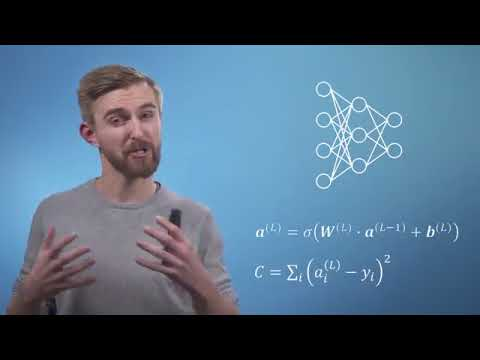

In [1]:
#First, watch the video.

from IPython.display import YouTubeVideo
YouTubeVideo('qBDMO6hnyxA', width=700, height=500)

**Problem 1.**  In this exercise we'll look in more detail about back-propagation, using the chain rule, in order to train our neural networks.

Let's look again at our two-node network.

 ![](./images/simple1.png)

   Recall the activation equations are,
   \begin{eqnarray*}
     a^{(1)} &=& \sigma (z^{(1)})\\
     z^{(1)} &=& w^{(1)}a^{(0)}+b^{(1)}.
   \end{eqnarray*} 
   Here we've introduced $z^{(1)}$ as the weighted sum of activation and bias.
   
   We can formalize how good (or bad) our neural network is at getting the desired behaviour. 
   For a particular input, $x$, and desired output $y$, we can define the cost of that specific
   training example as the square of the difference between the network's output and the desired
   output, that is,
   $$ C_k = (a^{(1)}-y)^2,$$
   where $k$ labels  the training example and $a^{(1)}$
   is assumed to be the activation of the output neuron when the input neuron $a^{(0)}$
     is set to $x$.
     
   We'll go into detail about how to apply this to an entire set of training data later on. 
   But for now, let's look at our toy example.
   
   Recall our *NOT function* example from the previous quiz. For the input $x = 1$
   we would like that the network outputs $y = 0$. 
   For the starting weight and bias $w^{(1)}=1.3$ and $b^{(1)} = -0.1$, 
   the network actually outputs $a^{(1)}=0.834$. 
   If we work out the cost function for this example, we get
   $$C_1 = (0.834 - 0)^2 = 0.696. $$
   Do the same calculation for an input $x=0$ and desired output $y=1$ 
   by completing the code block below. What is $C_0$ in this particular case?    

In [ ]:
import numpy as np

# First we set the state of the network
sigma = np.tanh
w1 = 1.3
b1 = -0.1

#
# Your code here
#

print(c0)

**Problem 2**  The cost function of a training set is the average of the individual cost functions of the data in the training set,
$$ C = \frac{1}{N}\sum_k C_k, $$
where $N$ is the number of examples in the training set.

For the `NOT` function we have been considering, where we have two examples in our training set, $(x=0,y=1)$ and $(x=1,y=0)$, the training set cost function is 
$$ C = \frac{1}{2} (C_0+C_1).$$

Since our parameter space is 2D, $(w^{(1)}, b^{(1)})$, we can draw the total cost function for this neural network as a contour map: 

 <img src="images/simple4.png" width="400">

Here white represents low costs and black represents high costs.

Which of the following statements are true?

    (a) The optimal configuration lies along the line $b=0$.
    (b) The optimal configuration lies somewhere along the line $b=-w$.
    (c) Descending perpendicular to the contours will improve the performance of the network.
    (d) There are many different local minima in this system.
    (e) None of the other statements are true.

**Problem 3**  To improve the performance of the neural network on the training data, we can vary the weight and bias. We can calculate the derivative of the example cost with respect to these quantities using the chain rule.
$$ 
    \begin{eqnarray}
     \frac{\partial C_k}{\partial w^{(1)}} &=&  
          \frac{\partial C_k}{\partial a^{(1)}}
          \frac{\partial a^{(1)}}{\partial z^{(1)}}
          \frac{\partial z^{(1)}}{\partial w^{(1)}} \\
     \frac{\partial C_k}{\partial b^{(1)}} &=&  
          \frac{\partial C_k}{\partial a^{(1)}}
          \frac{\partial a^{(1)}}{\partial z^{(1)}}
          \frac{\partial z^{(1)}}{\partial b^{(1)}}
    \end{eqnarray}
$$

Individually, these derivatives take fairly simple form. Select all the true statements below.     

   (a) $\frac{\partial z^{(1)}}{\partial b^{(1)}} = 1$
   
   (b) $\frac{\partial a^{(1)}}{\partial z^{(1)}} = \sigma$
   
   (c) $\frac{\partial z^{(1)}}{\partial w^{(1)}} = a^{(0)}$
   
   (d) $\frac{\partial z^{(1)}}{\partial b^{(1)}} = a^{(1)}$
   
   (e) $\frac{\partial C_k}{\partial a^{(1)}} = 2(a^{(1)}-y)$
   
   (f) $\frac{\partial C_k}{\partial a^{(1)}} = (1-y)^2$
   
   (g) $\frac{\partial z^{(1)}}{\partial w^{(1)}} = w^{(1)}$
   
   (e) $\frac{\partial a^{(1)}}{\partial z^{(1)}} = \sigma^\prime (z^{(1)})$


**Problem 4** 
The following is a code block implementing 
$\frac{\partial C_k}{\partial w^{(1)}}$ and $\frac{\partial C_k}{\partial b^{(1)}}$ as `dCdw` and `dCdb`, respectively. Here the derivative of the active function is
$$ \frac{d}{dt}\left[ \tanh (z)\right] = \frac{1}{\cosh^2(z)}.$$

Complete the function  `dCdw` and `dCdb` in the code below.
Replace the ???, with the expression you calculated in the previous question.

In [ ]:
import numpy as np

# First define our sigma function.
sigma = np.tanh

# Next define the feed-forward equation.
def a1 (w1, b1, a0) :
  z = w1 * a0 + b1
  return sigma(z)

# The individual cost function is the square of the difference between
# the network output and the training data output.
def C (w1, b1, x, y) :
  return (a1(w1, b1, x) - y)**2

# This function returns the derivative of the cost function with
# respect to the weight.
def dCdw (w1, b1, x, y) :
  z = w1 * x + b1
  dCda = ??? # Derivative of cost with activation
  dadz = ??? # derivative of activation with weighted sum z
  dzdw = ? # derivative of weighted sum z with weight
  return dCda * dadz * dzdw # Return the chain rule product.

# This function returns the derivative of the cost function with
# respect to the bias.
# It is very similar to the previous function.
# You should complete this function.
def dCdb (w1, b1, x, y) :
  z = w1 * x + b1
  dCda = ???
  dadz = ???
  """ Change the next line to give the derivative of
      the weighted sum, z, with respect to the bias, b. """
  dzdb = ???
  return dCda * dadz * dzdb

"""Test your code:"""
# Let's start with an unfit weight and bias.
w1 = 2.3
b1 = -1.2
# We can test on a single data point pair of x and y.
x = 0
y = 1
# Output how the cost would change
# in proportion to a small change in the bias
print( dCdb(w1, b1, x, y) )

**Problem 5.** Recall that when we add more neurons to the network, our quantities are upgraded to vectors or matrices.

 <img src="images/simple2.png" width="40%">
  
 $$
   \begin{eqnarray}
    \mathbf{a}^{(1)} &=& \sigma\left(\mathbf{z}^{(1)}\right)\\
    \mathbf{z}^{(1)} &=& \mathbf{W}^{(1)}\mathbf{a}^{(0)}+\mathbf{b}^{(1)}
   \end{eqnarray}
 $$
 
 The individual cost functions remain scalars. Instead of becoming vectors, the components are summed over each output neuron.
 
 $$ C_k = \sum_i\left( a_i^{(1)}-y_i\right)^2 $$
 
Note here that $i$ labels the output neuron and is summed over, 
whereas $k$ labels the training example.

The training data becomes a vector too,

 $x\rightarrow \mathbf{x}$ and has the same number of elements as input neurons.

 $y\rightarrow \mathbf{y}$ and has the same number of elements as output neurons.


This allows us to write the cost function in vector form using the modulus squared,
$$ C_k = |\mathbf{a}^{(1)} - \mathbf{y}|^2. $$

Complete the following code of calculating the cost function for this network. Replace ??? in the code.

In [ ]:
import numpy as np

# Define the activation function.
sigma = np.tanh

# Let's use a random initial weight and bias.
W = np.array([[-0.94529712, -0.2667356 , -0.91219181],
              [ 2.05529992,  1.21797092,  0.22914497]])
b = np.array([ 0.61273249,  1.6422662 ])

# define our feed forward function
def a1 (a0) :
  # Notice the next line is almost the same as previously,
  # except we are using matrix multiplication rather than scalar multiplication
  # hence the '@' operator, and not the '*' operator.
  z = ??? 
  # Everything else is the same though,
  return sigma(z)

# Next, if a training example is,
x = np.array([0.7, 0.6, 0.2])
y = np.array([0.9, 0.6])

# Then the cost function is,
d = ??? # Vector difference between observed and expected activation
C = d @ d # Absolute value squared of the difference.
print(C)

**Problem 6.** Now let's look at a network with a hidden layer.

<img src="images/simple3.png" width="50%">


 Training this network is done by **back-propagation** because we start at the output layer and calculate derivatives backwards towards the input layer with the chain rule. 
 
 Let's see how this works.
 
 If we wanted to calculate the derivative of the cost with respect to the weight or bias of the final layer, then this is the same as previously (but now in vector form):
 
 $$ \frac{\partial C_k}{\partial \mathbf{W}^{(2)}} =
     \frac{\partial C_k}{\partial \mathbf{a}^{(2)}}
     \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(2)}}
     \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{W}^{(2)}}.
 $$
 
With a similar term for the bias. If we want to calculate the derivative with respects to weights of the previous layer, we use the expression,

$$ \frac{\partial C_k}{\partial \mathbf{W}^{(1)}} =
     \frac{\partial C_k}{\partial \mathbf{a}^{(2)}}
     \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{a}^{(1)}}
     \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(1)}}
     \frac{\partial \mathbf{z}^{(1)}}{\partial \mathbf{W}^{(1)}}.
 $$


Where $\frac{\partial\mathbf{a}^{(2)}}{\partial\mathbf{a}^{(1)}}$ 
itself can be expanded to,
$$
 \frac{\partial\mathbf{a}^{(2)}}{\partial\mathbf{a}^{(1)}} =
   \frac{\partial\mathbf{a}^{(2)}}{\partial\mathbf{z}^{(2)}}
   \frac{\partial\mathbf{z}^{(2)}}{\partial\mathbf{a}^{(1)}}.
$$

This can be generalised to any layer,

$$ \frac{\partial C_k}{\partial \mathbf{W}^{(i)}} =
     \frac{\partial C_k}{\partial \mathbf{a}^{(N)}}
     \underbrace{\frac{\partial \mathbf{a}^{(N)}}{\partial \mathbf{a}^{(N-1)}}
     \frac{\partial \mathbf{a}^{(N-1)}}{\partial \mathbf{a}^{(N-2)}}
     \cdots
      \frac{\partial \mathbf{a}^{(i+1)}}{\partial \mathbf{a}^{(i)}} }_\text{
      from layer $N$ to layer $i$}
     \frac{\partial \mathbf{a}^{(i)}}{\partial \mathbf{z}^{(i)}}
     \frac{\partial \mathbf{z}^{(i)}}{\partial \mathbf{W}^{(i)}}
 $$
by further application of the chain rule.

Remembering the activation equations are
$$
  \begin{eqnarray}
    a^{(n)} &=& \sigma (z^{(n)}) \\
    z^{(n)} &=& w^{(n)}a^{(n-1)}+b^{(n)}
  \end{eqnarray}
$$
write the correct expression for the derivative
$$ \frac{\partial\mathbf{a}^{(j)}}{\partial\mathbf{a}^{(j-1)}} = \hspace{6in}$$.

